In [1]:
import pandas as pd

In [3]:
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [5]:
df = pd.read_excel('data_set.xlsx')

In [7]:
df.head()

,City,Store Name,Store Address,Postal Code,Store Phone Number,Store Category
0,Toronto,Walmart,"900 Dufferin St, Toronto, ON",M6H 4A9,(416) 537-2561,Groceries
1,Mississauga,Costco,"1570 Dundas St E, Mississauga, ON",L4X 1L4,(905) 566-2294,Wholesale
2,Brampton,Best Buy,"60 Great Lakes Dr, Brampton, ON",L6R 2K7,(905) 793-3720,Electronics
3,Hamilton,Home Depot,"350 Centennial Pkwy N, Hamilton, ON",L8E 2X4,(905) 561-9755,Home Improvement
4,London,Canadian Tire,"1125 Wellington Rd, London, ON",N6E 1M1,(519) 686-5350,General Retail


In [9]:
df

,City,Store Name,Store Address,Postal Code,Store Phone Number,Store Category
0,Toronto,Walmart,"900 Dufferin St, Toronto, ON",M6H 4A9,(416) 537-2561,Groceries
1,Mississauga,Costco,"1570 Dundas St E, Mississauga, ON",L4X 1L4,(905) 566-2294,Wholesale
2,Brampton,Best Buy,"60 Great Lakes Dr, Brampton, ON",L6R 2K7,(905) 793-3720,Electronics
3,Hamilton,Home Depot,"350 Centennial Pkwy N, Hamilton, ON",L8E 2X4,(905) 561-9755,Home Improvement
4,London,Canadian Tire,"1125 Wellington Rd, London, ON",N6E 1M1,(519) 686-5350,General Retail
5,Kitchener,Lowe's,"1375 Weber St E, Kitchener, ON",N2A 1C4,(519) 772-0015,Home Improvement
6,Windsor,The Brick,"4339 Walker Rd, Windsor, ON",N8W 3T6,(519) 966-7777,Furniture
7,St. Catharines,Staples,"285 Geneva St, St. Catharines, ON",L2N 2G1,(905) 646-4227,Office Supplies
8,Oshawa,Walmart,"680 Laval Dr, Oshawa, ON",L1J 0B5,(905) 438-1400,Groceries
9,Barrie,Costco,"41 Mapleview Dr E, Barrie, ON",L4N 9A9,(705) 733-2555,Wholesale


In [11]:
pip install ortools

   ---------------------------------------- 0.0/142.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/142.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/142.5 MB 487.6 kB/s eta 0:04:53
   ---------------------------------------- 0.3/142.5 MB 2.3 MB/s eta 0:01:02
   ---------------------------------------- 1.3/142.5 MB 8.3 MB/s eta 0:00:17
    --------------------------------------- 2.5/142.5 MB 12.0 MB/s eta 0:00:12
   - -------------------------------------- 4.4/142.5 MB 17.4 MB/s eta 0:00:08
   - -------------------------------------- 5.8/142.5 MB 19.3 MB/s eta 0:00:08
   -- ------------------------------------- 7.7/142.5 MB 22.5 MB/s eta 0:00:06
   -- ------------------------------------- 9.9/142.5 MB 25.2 MB/s eta 0:00:06
   --- ------------------------------------ 12.4/142.5 MB 40.9 MB/s eta 0:00:04
   --- ------------------------------------ 13.7/142.5 MB 40.9 MB/s eta 0:00:04
   ---- ----------------------------------- 16.7/142.5 MB 46.7 MB/s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.26.1 which is incompatible.


In [13]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# Example distance matrix for cities in Southern Ontario (values are arbitrary and should be based on real data)
# You can use Google Maps API or other mapping tools to create a real-world distance matrix
distance_matrix = [
    [0, 28, 30, 71, 180, 110, 374, 111, 61, 87],  # Toronto
    [28, 0, 15, 47, 163, 88, 354, 111, 72, 95],   # Mississauga
    [30, 15, 0, 49, 164, 88, 353, 118, 77, 101],  # Brampton
    [71, 47, 49, 0, 130, 82, 304, 138, 110, 144], # Hamilton
    [180, 163, 164, 130, 0, 99, 200, 206, 184, 210], # London
    [110, 88, 88, 82, 99, 0, 278, 167, 89, 124],  # Kitchener
    [374, 354, 353, 304, 200, 278, 0, 374, 340, 367], # Windsor
    [111, 111, 118, 138, 206, 167, 374, 0, 83, 118],  # St. Catharines
    [61, 72, 77, 110, 184, 89, 340, 83, 0, 36],   # Oshawa
    [87, 95, 101, 144, 210, 124, 367, 118, 36, 0], # Barrie
]

# City names corresponding to the distance matrix
city_names = ["Toronto", "Mississauga", "Brampton", "Hamilton", "London", "Kitchener", 
              "Windsor", "St. Catharines", "Oshawa", "Barrie"]

# Step 1: Define the data model for OR-Tools
def create_data_model():
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 1  # Only one salesperson (vehicle)
    data['depot'] = 0  # Starting point is Toronto (index 0)
    return data

# Step 2: Define the routing problem
def main():
    # Instantiate the data problem
    data = create_data_model()

    # Create the routing index manager
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])

    # Create Routing Model
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback that calculates the distances
    def distance_callback(from_index, to_index):
        # Convert from routing variable Index to distance matrix NodeIndex
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc (route segment)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Set the search parameters
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem
    solution = routing.SolveWithParameters(search_parameters)

    # Step 3: Print the solution
    if solution:
        print_solution(manager, routing, solution)

# Step 3: Print the solution (route and total distance)
def print_solution(manager, routing, solution):
    """Prints the solution on console."""
    print('Optimized Route:')
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += f'{city_names[manager.IndexToNode(index)]} -> '
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f'{city_names[manager.IndexToNode(index)]}\n'
    plan_output += f'Total Distance: {route_distance} km\n'
    print(plan_output)

if __name__ == '__main__':
    main()

Optimized Route:
Route:
Toronto -> Mississauga -> Brampton -> Hamilton -> Kitchener -> London -> Windsor -> St. Catharines -> Oshawa -> Barrie -> Toronto
Total Distance: 1053 km



In [15]:
pip install geopandas matplotlib geopy


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------------------- -------------- 204.8/323.6 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 10.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/16.2 MB 17.6 MB/s eta 0:00:01
   -------- ------------------------------- 3.4/16.2 MB 24.0 MB/s eta 0:00:01
   ------------- -------------------------- 5.4/16.2 MB 29.0 MB/s eta 0:00:01
   ----------------- ---------------------- 7.2/16.2 MB 30.6 MB/s eta 0:00:01
   -------------

In [17]:
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString

# Initialize geolocator
geolocator = Nominatim(user_agent="route_visualizer")

# List of cities in order
cities = ["Toronto", "Mississauga", "Brampton", "Hamilton", "Kitchener", 
          "London", "Windsor", "St. Catharines", "Oshawa", "Barrie", "Toronto"]

# Get coordinates for each city
coordinates = []
for city in cities:
    location = geolocator.geocode(city + ", Ontario")
    coordinates.append((location.longitude, location.latitude))

# Create a GeoDataFrame for cities
gdf_cities = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in coordinates])

# Create a LineString for the route
route = LineString([Point(lon, lat) for lon, lat in coordinates])

# Load a base map of Ontario (or Canada)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ontario = world[world.name == "Canada"]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
ontario.plot(ax=ax, color='lightgray')

# Plot the route
gdf_route = gpd.GeoDataFrame(geometry=[route])
gdf_route.plot(ax=ax, color='blue', linewidth=2, label="Route")

# Plot the cities
gdf_cities.plot(ax=ax, color='red', markersize=50, label="Cities")

# Annotate city names
for i, city in enumerate(cities):
    ax.text(coordinates[i][0], coordinates[i][1], city, fontsize=9)

# Add title and legend
plt.title("Route Visualization: Toronto -> Toronto", fontsize=16)
plt.legend()
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [21]:
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString

# Initialize geolocator
geolocator = Nominatim(user_agent="route_visualizer")

# List of cities in order
cities = ["Toronto", "Mississauga", "Brampton", "Hamilton", "Kitchener", 
          "London", "Windsor", "St. Catharines", "Oshawa", "Barrie", "Toronto"]

# Get coordinates for each city
coordinates = []
for city in cities:
    location = geolocator.geocode(city + ", Ontario")
    coordinates.append((location.longitude, location.latitude))

# Create a GeoDataFrame for cities
gdf_cities = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat) in coordinates])

# Create a LineString for the route
route = LineString([Point(lon, lat) for lon, lat in coordinates])

# Load the Natural Earth shapefile
# Specify the path to the downloaded and extracted 'ne_110m_admin_0_countries.shp' file
world = gpd.read_file("./ne_110m_admin_0_countries.shp")

# Filter for just Canada
ontario = world[world.name == "Canada"]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
ontario.plot(ax=ax, color='lightgray')

# Plot the route
gdf_route = gpd.GeoDataFrame(geometry=[route])
gdf_route.plot(ax=ax, color='blue', linewidth=2, label="Route")

# Plot the cities
gdf_cities.plot(ax=ax, color='red', markersize=50, label="Cities")

# Annotate city names
for i, city in enumerate(cities):
    ax.text(coordinates[i][0], coordinates[i][1], city, fontsize=9)

# Add title and legend
plt.title("Route Visualization: Toronto -> Toronto", fontsize=16)
plt.legend()
plt.show()


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (4042589309.py, line 20)

In [23]:
pip install cartopy geopy matplotlib


     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     --------------------------- ---------- 41.0/56.0 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 491.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 3.3 MB/s eta 0:00:04
    --------------------------------------- 0.2/11.0 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.3/11.0 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.0 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/11.0 MB 2.1 MB/s eta 0:00:05
   --- -

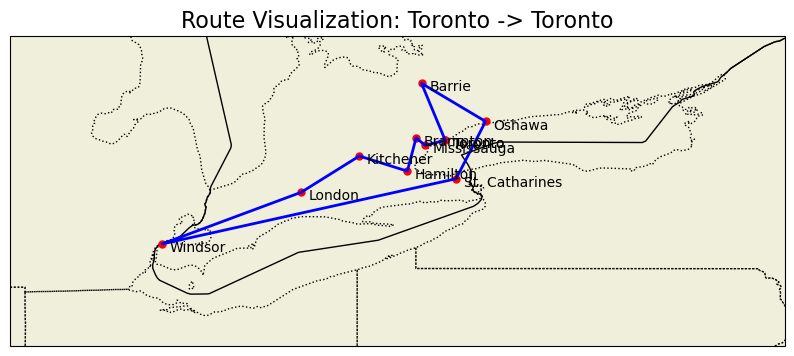

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point, LineString

# Initialize geolocator and rate limiter to avoid getting blocked by the API
geolocator = Nominatim(user_agent="route_visualizer")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# List of cities in the route
cities = ["Toronto", "Mississauga", "Brampton", "Hamilton", "Kitchener", 
          "London", "Windsor", "St. Catharines", "Oshawa", "Barrie", "Toronto"]

# Get coordinates for each city
coordinates = []
for city in cities:
    location = geocode(city + ", Ontario")
    coordinates.append((location.longitude, location.latitude))

# Create a figure and axis with a projection for the map
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features for land, borders, and coastlines
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle=':')

# Plot the cities as points
for coord, city in zip(coordinates, cities):
    ax.plot(coord[0], coord[1], marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(coord[0] + 0.1, coord[1] - 0.1, city, fontsize=10, transform=ccrs.PlateCarree())

# Create a LineString for the route and plot it
route = LineString([Point(lon, lat) for lon, lat in coordinates])
x, y = route.xy
ax.plot(x, y, color='blue', linewidth=2, transform=ccrs.PlateCarree())

# Set the extent of the map to focus on Southern Ontario
ax.set_extent([-85, -75, 41, 45], crs=ccrs.PlateCarree())

# Add title
plt.title("Route Visualization: Toronto -> Toronto", fontsize=16)

# Show the plot
plt.show()
plt.savefig("route_visualization.jpg", dpi=300)

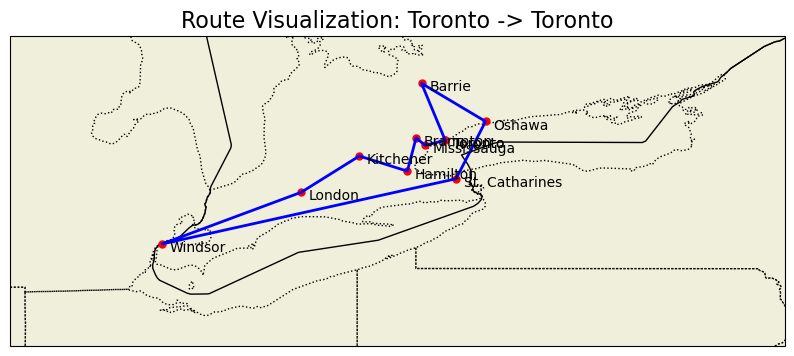

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point, LineString

# Initialize geolocator and rate limiter to avoid getting blocked by the API
geolocator = Nominatim(user_agent="route_visualizer")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# List of cities in the route
cities = ["Toronto", "Mississauga", "Brampton", "Hamilton", "Kitchener", 
          "London", "Windsor", "St. Catharines", "Oshawa", "Barrie", "Toronto"]

# Get coordinates for each city
coordinates = []
for city in cities:
    location = geocode(city + ", Ontario")
    coordinates.append((location.longitude, location.latitude))

# Create a figure and axis with a projection for the map
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features for land, borders, and coastlines
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle=':')

# Plot the cities as points
for coord, city in zip(coordinates, cities):
    ax.plot(coord[0], coord[1], marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(coord[0] + 0.1, coord[1] - 0.1, city, fontsize=10, transform=ccrs.PlateCarree())

# Create a LineString for the route and plot it
route = LineString([Point(lon, lat) for lon, lat in coordinates])
x, y = route.xy
ax.plot(x, y, color='blue', linewidth=2, transform=ccrs.PlateCarree())

# Set the extent of the map to focus on Southern Ontario
ax.set_extent([-85, -75, 41, 45], crs=ccrs.PlateCarree())

# Add title
plt.title("Route Visualization: Toronto -> Toronto", fontsize=16)

# Force drawing before saving
plt.draw()

# Save the plot as an image file
plt.savefig("route_visualization.jpg", dpi=300, bbox_inches='tight')  # Save as PNG with 300 DPI

# Show the plot
plt.show()
